-----------------------------------------------------------------------------------------------------------------------------

### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

-----------------------------------------------------------------------------------------------------------------------------

#### 1. Import the necessary packages - 2.5 marks

In [5]:
import pandas as pd, numpy as np, scipy.stats as stats, matplotlib.pyplot as plt, seaborn as sns

-----------------------------------------------------------------------------------------------------------------------------

In [6]:
rating_data= pd.read_csv('Data.csv')
user_data=pd.read_csv('user.csv')
movieitem_data=pd.read_csv('item.csv')

-----------------------------------------------------------------------------------------------------------------------------

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

-----------------------------------------------------------------------------------------------------------------------------

4.4 3.1. (1) Know your data objects. DataFrame.info() This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

-----------------------------------------------------------------------------------------------------------------------------

In [7]:
# rating_data dataframe info.
print("Details of the rating_data DataFrame:")
rating_data.info()

Details of the rating_data DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
# user_data dataframe info.
print("Details of the user_data DataFrame:")
user_data.info()

Details of the user_data DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [9]:
# movieitem_data dataframe info.
print("Details of the movieitem_data DataFrame:")
movieitem_data.info()

Details of the movieitem_data DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi 

-----------------------------------------------------------------------------------------------------------------------------

4.4 3.2. (2)Examine the data objects. Use Dataframe.head() function. This function returns the first 5 rows for the object based on position.

-----------------------------------------------------------------------------------------------------------------------------


In [10]:
# first 20 rows in rating_data dataframe extracted from dataset in Data.csv
rating_data.head(20)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [11]:
# first 10 rows in user_data dataframe extracted from dataset in user.csv
user_data.head(10)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [12]:
# first 5 rows in movieitem_data dataframe extracted from dataset in item.csv
movieitem_data.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


-----------------------------------------------------------------------------------------------------------------------------

4.4 3.3. (3)Examine the dimension of each dataframe. DataFrame.shape function returns a tuple representing the dimensionality of the DataFrame with format:(row,column).

-----------------------------------------------------------------------------------------------------------------------------

In [13]:
# the dimension of rating_data dataframe extracted from dataset in Data.csv
print("Dimension (row,column) of rating_data DataFrame: ")
rating_data.shape

Dimension (row,column) of rating_data DataFrame: 


(100000, 4)

In [56]:
# the dimension of user_data dataframe extracted from dataset in user.csv
print("Dimension (row,column) of user_data DataFrame: ")
user_data.shape

Dimension (row,column) of user_data DataFrame: 


(943, 5)

In [57]:
# the dimension of movieitem_data dataframe extracted from dataset in item.csv
print("Dimension (row,column) of movieitem_data DataFrame: ")
movieitem_data.shape

Dimension (row,column) of movieitem_data DataFrame: 


(1681, 22)

-----------------------------------------------------------------------------------------------------------------------------

4.4 3.4. (4) Perform descriptive statistics which include summary of the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

-----------------------------------------------------------------------------------------------------------------------------

In [24]:
rating_data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [61]:
#describe() with transpose()
rating_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [25]:
user_data.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [358]:
#describe() with transpose()
user_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [64]:
movieitem_data.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [359]:
#describe() with transpose()
movieitem_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


-----------------------------------------------------------------------------------------------------------------------------

4.4 3.5. (5) Find the missing values. DataFrame.isnull() Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, this tuples will charted to True values. But if the tuple contains a data, this will be charted into False.

-----------------------------------------------------------------------------------------------------------------------------

In [360]:
# 1. Checking the dataset rating_data for the presence of missing values
rating_data.isnull()

,user id,movie id,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [71]:
rating_data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [101]:
rating_data.isnull().any()

user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

In [34]:
# 2. Checking the dataset user_data for the presence of missing values
user_data.isnull()

,user id,age,gender,occupation,zip code
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
938,False,False,False,False,False
939,False,False,False,False,False
940,False,False,False,False,False
941,False,False,False,False,False


In [68]:
user_data.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [100]:
user_data.isnull().any()

user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

In [35]:
# 3. Checking the dataset movieitem_data for the presence of missing values
movieitem_data.isnull()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
movieitem_data.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [99]:
movieitem_data.isnull().any()

movie id        False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
dtype: bool

-----------------------------------------------------------------------------------------------------------------------------

#### 4. Find the number of movies per genre using the item data - 2.5 marks

-----------------------------------------------------------------------------------------------------------------------------

In [136]:
print("Recorded Movies per Genre: ")
movieitem_data.sum()

Recorded Movies per Genre: 


movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

Removing the "movie id" column to extract genra columns.

In [114]:
movieitemcopied_data = movieitem_data.copy()

In [133]:
#remove Non-Genre Columns
movieitemcopied_data.drop(["movie id","movie title","release date"],axis=1,inplace=True)

In [137]:
#counting the number of movies in each genre.
movieitemcopied_data.sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [14]:
#Another way of doing it...
pd.DataFrame(movieitem_data.iloc[:,3:22].sum(), columns= ['Number of Movies per Genre'])

,Number of Movies per Genre
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


-----------------------------------------------------------------------------------------------------------------------------

Finding the Missing values in rating_data, user_data, and movieitem_data DataFrames.

-----------------------------------------------------------------------------------------------------------------------------

In [86]:
rating_data.count()

user id      100000
movie id     100000
rating       100000
timestamp    100000
dtype: int64

In [87]:
user_data.count()

user id       943
age           943
gender        943
occupation    943
zip code      943
dtype: int64

In [141]:
movieitem_data.count()

movie id        1681
movie title     1681
release date    1681
unknown         1681
Action          1681
Adventure       1681
Animation       1681
Childrens       1681
Comedy          1681
Crime           1681
Documentary     1681
Drama           1681
Fantasy         1681
Film-Noir       1681
Horror          1681
Musical         1681
Mystery         1681
Romance         1681
Sci-Fi          1681
Thriller        1681
War             1681
Western         1681
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------

#### 5. Find the movies that have more than one genre - 5 marks

-----------------------------------------------------------------------------------------------------------------------------

In [20]:
moviesitemsdatax= pd.read_csv('item.csv')

In [376]:
moviesitemsdatax.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
genres = moviesitemsdatax.columns.values.tolist()[3:]
moviesitemsdatax['genre_total'] = moviesitemsdatax[genres].sum(axis=1)
moviesitemsdatax[moviesitemsdatax['genre_total'] > 1]['movie title']

0                                Toy Story 
1                                GoldenEye 
2                               Four Rooms 
3                               Get Shorty 
4                                  Copycat 
                       ...                 
1676                            Mat' i syn 
1677                             B. Monkey 
1678                         Sliding Doors 
1679                          You So Crazy 
1680    Scream of Stone (Schrei aus Stein) 
Name: movie title, Length: 1681, dtype: object

-----------------------------------------------------------------------------------------------------------------------------

#### 6. Drop the movie where the genre is unknown - 2.5 marks

-----------------------------------------------------------------------------------------------------------------------------

In [22]:
#Drop the movie where the genre is unknown 
moviesitemsdata= pd.read_csv('item.csv')
dropmovies = moviesitemsdata[(moviesitemsdata['unknown']!=1)]

In [370]:
pd.DataFrame(dropmovies.iloc[:,3:4].sum(), columns= ['Number of Movies per Genre'])

,Number of Movies per Genre
unknown,0


-----------------------------------------------------------------------------------------------------------------------------

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [292]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [295]:
rating_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [296]:
user_data.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [297]:
movieitem_data.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,12,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,15,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,12,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,21,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,24,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
#your answers here
user_rating = pd.merge(rating_data,user_data,how='outer',on='user id') 
merged_movielens_data = pd.merge(user_rating,movieitem_data,how='outer',on='movie id')

In [324]:
merged_movielens_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user id       100000 non-null  int64  
 1   movie id      100000 non-null  int64  
 2   rating        100000 non-null  int64  
 3   timestamp     100000 non-null  int64  
 4   age           100000 non-null  int64  
 5   gender        100000 non-null  object 
 6   occupation    100000 non-null  object 
 7   zip code      100000 non-null  object 
 8   movie title   99991 non-null   float64
 9   release date  99991 non-null   object 
 10  unknown       99991 non-null   float64
 11  Action        99991 non-null   float64
 12  Adventure     99991 non-null   float64
 13  Animation     99991 non-null   float64
 14  Childrens     99991 non-null   float64
 15  Comedy        99991 non-null   float64
 16  Crime         99991 non-null   float64
 17  Documentary   99991 non-null   float64
 18  Drama

In [24]:
#how to get to release year from release date. You can use str.split()
releaseyear_data = merged_movielens_data["release date"].str.split("-", n = 2, expand = True) 
print(releaseyear_data)

        0    1     2
0      24  Jan  1997
1      24  Jan  1997
2      24  Jan  1997
3      24  Jan  1997
4      24  Jan  1997
...    ..  ...   ...
99995  06  Feb  1998
99996  06  Feb  1998
99997  01  Jan  1998
99998  01  Jan  1994
99999  08  Mar  1996

[100000 rows x 3 columns]


In [327]:
merged_movielens_data["release year"]= releaseyear_data[2] 
merged_movielens_data.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total,release year
0,196,242,3,881250949,49,M,writer,55105,729.0,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
1,305,242,5,886307828,23,M,programmer,94086,729.0,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
2,6,242,4,883268170,42,M,executive,98101,729.0,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
3,234,242,4,891033261,60,M,retired,94702,729.0,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997
4,63,242,3,875747190,31,M,marketing,75240,729.0,24-Jan-1997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1997


-----------------------------------------------------------------------------------------------------------------------------

Using distplot for age and countplot for gender,ratings,occupation, release year.

-----------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'User Dataset Age Distribution')

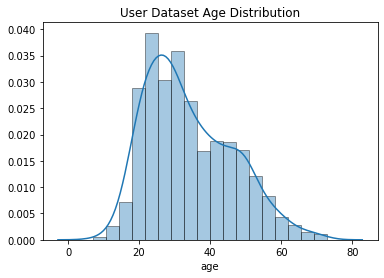

In [329]:
#displot for age
sns.distplot(user_data['age'], hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('User Dabtaset Age Distribution')

Text(0.5, 1.0, 'User Dataset Gender,Ratings,Occupation countplot')

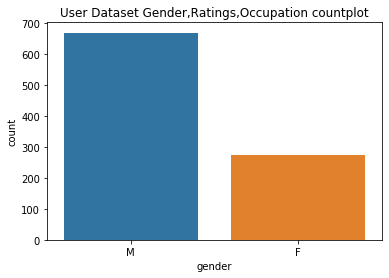

In [332]:
#countplots for gender
sns.countplot(x = user_data['gender'])
plt.title('User Dataset Gender countplot')

Text(0.5, 1.0, 'User Dataset Rating Counts')

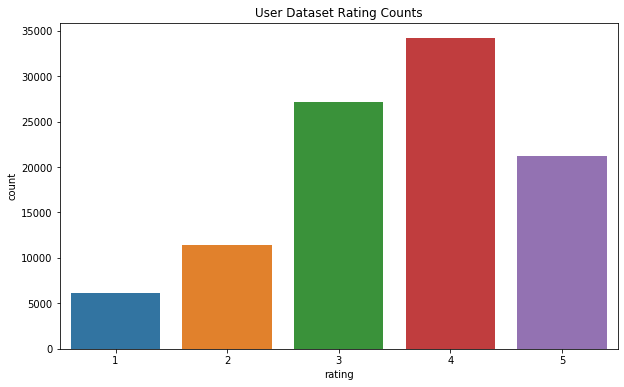

In [346]:
#countplots for ratings
plt.figure(figsize=(10,6))
sns.countplot(x = merged_movielens_data['rating'])
plt.title('User Dataset Rating Counts')

Text(0.5, 1.0, 'User Dataset Rating per Gender Counts')

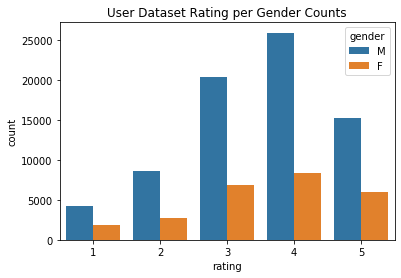

In [342]:
#countplots for ratings per gender
sns.countplot(x = merged_movielens_data['rating'], hue = merged_movielens_data['gender'])
plt.title('User Dataset Rating per Gender Counts')

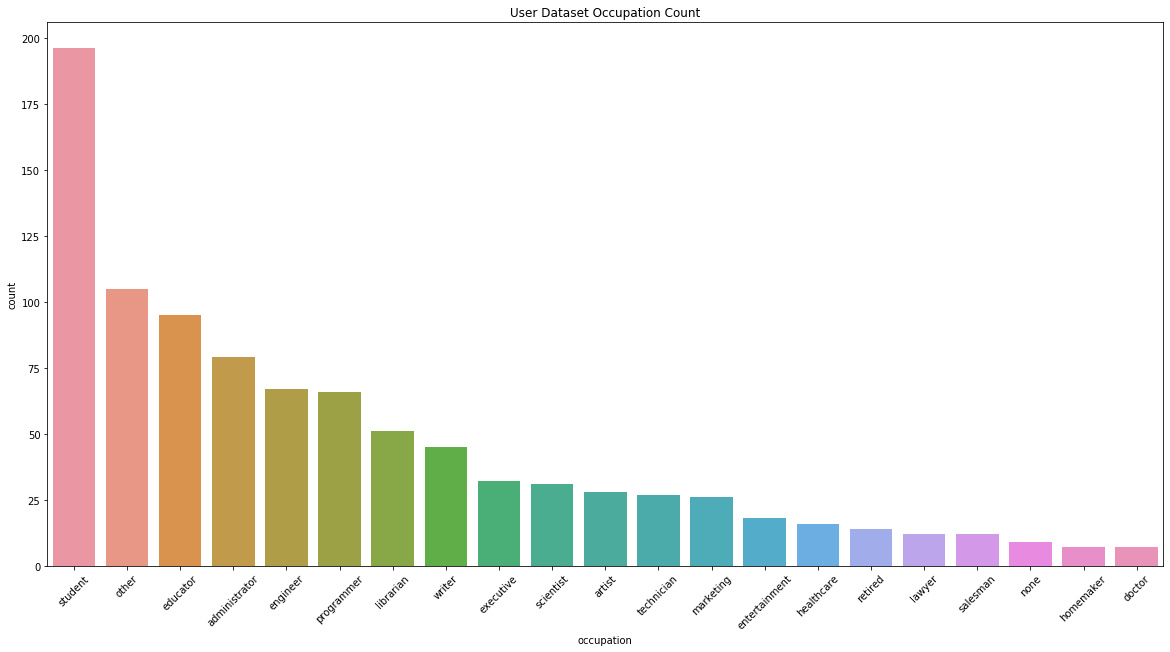

In [348]:
#countplots for occupation
plt.figure(figsize=(20,10))
sns.countplot(x = user_data['occupation'], order = user_data['occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.title('User Dataset Occupation Count')
plt.show()

Text(0.5, 1.0, 'Movie Item Dataset Distribution by Year')

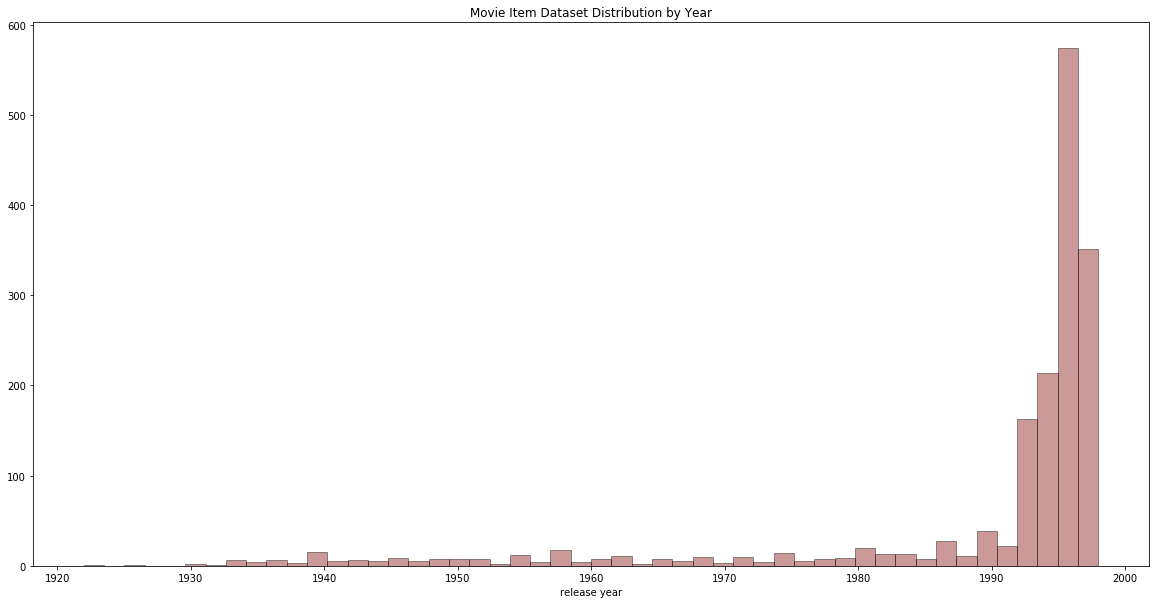

In [347]:
movieitem_data2 = movieitem_data
releasedate_data = movieitem_data["release date"].str.split("-", n = 2, expand = True) 
movieitem_data2["release year"]= releasedate_data[2] 
plt.figure(figsize=(20,10))
sns.distplot(movieitem_data2['release year'], kde=False, color="maroon", hist_kws=dict(edgecolor="k", linewidth=1))
plt.title('Movie Item Dataset Distribution by Year')


-----------------------------------------------------------------------------------------------------------------------------

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [382]:
#DataFrame where the release year is the index and the genre is the column names 
#(one cell shows the number of release in a year in one genre) or vice versa.
movieitem_data3=movieitem_data2.iloc[:,3:25]
movieitem_data3.drop(columns = 'genre_total')
movieitem_data3.set_index('release year',inplace=True)
movieitem_data3.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total
release year,,,,,,,,,,,,,,,,,,,,
1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0
1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0
1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.0


In [385]:
#Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.
groupby_movieitem_data3 = movieitem_data3.groupby('release year').sum()
groupby_movieitem_data3.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_total
release year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3.0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2.0


-----------------------------------------------------------------------------------------------------------------------------

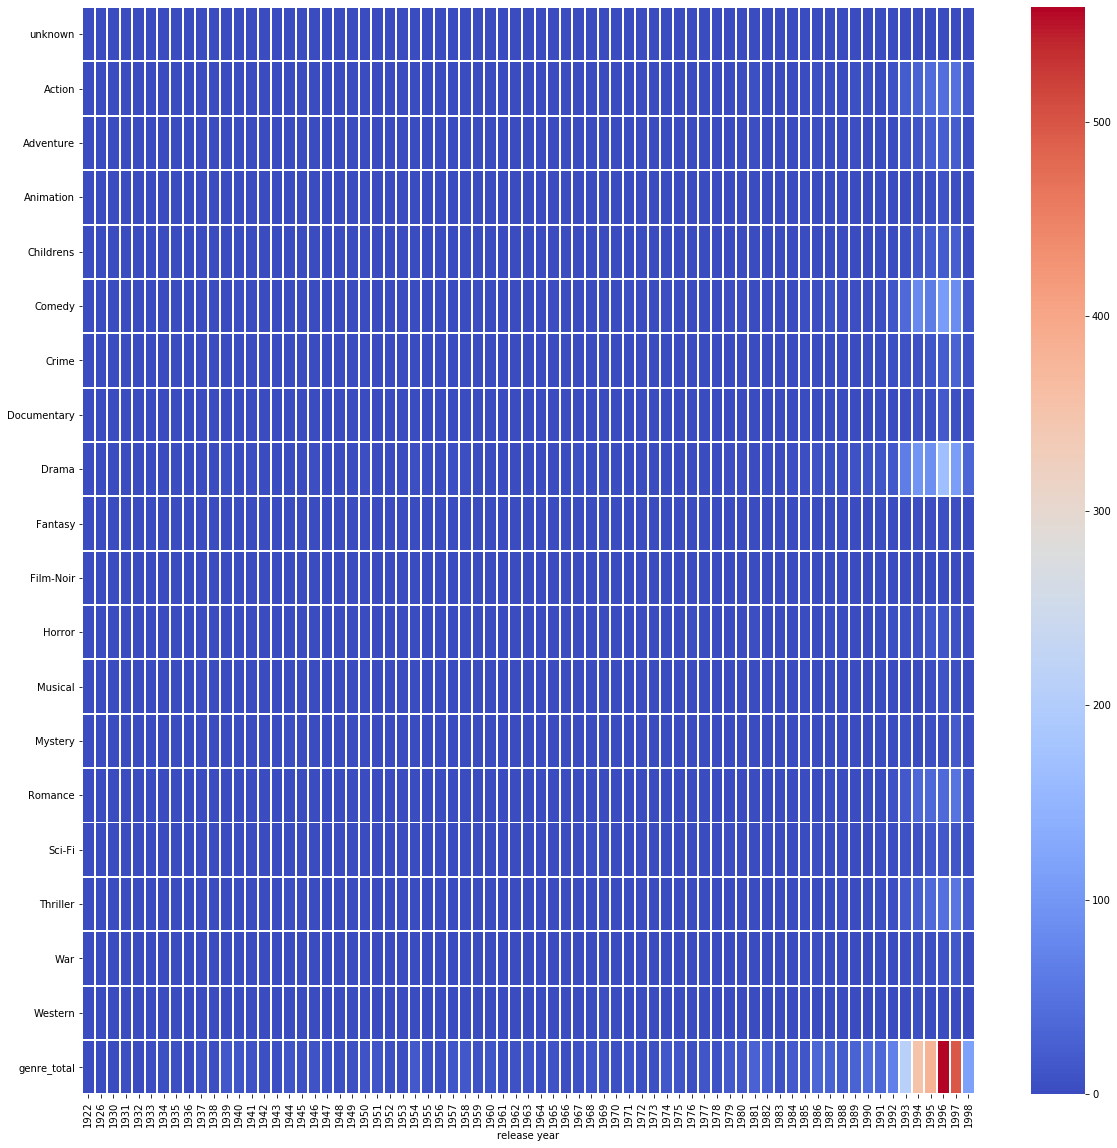

In [386]:
#heatmap to visualise all the changes over the years in one go.
plt.figure(figsize=(20,20))
sns.heatmap(groupby_movieitem_data3.T, linewidths=1, cmap='coolwarm')

-----------------------------------------------------------------------------------------------------------------------------

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

-----------------------------------------------------------------------------------------------------------------------------

In [75]:
#First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
movieswithmorethan100ratings = pd.merge(rating_data,movieitem_data,how='outer',on='movie id')

In [76]:
#create new movieswithmorethan100ratings
movieswithmorethan100ratings_new = movieswithmorethan100ratings.iloc[:,np.r_[4,6:25]]

In [77]:
#.info()
movieswithmorethan100ratings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie title  99991 non-null  object 
 1   unknown      99991 non-null  float64
 2   Action       99991 non-null  float64
 3   Adventure    99991 non-null  float64
 4   Animation    99991 non-null  float64
 5   Childrens    99991 non-null  float64
 6   Comedy       99991 non-null  float64
 7   Crime        99991 non-null  float64
 8   Documentary  99991 non-null  float64
 9   Drama        99991 non-null  float64
 10  Fantasy      99991 non-null  float64
 11  Film-Noir    99991 non-null  float64
 12  Horror       99991 non-null  float64
 13  Musical      99991 non-null  float64
 14  Mystery      99991 non-null  float64
 15  Romance      99991 non-null  float64
 16  Sci-Fi       99991 non-null  float64
 17  Thriller     99991 non-null  float64
 18  War          99991 non-null  float64
 19  Wes

In [78]:
#groupby
groupby_movieswithmorethan100ratings_new= movieswithmorethan100ratings_new.groupby('movie title').sum()
groupby_movieswithmorethan100ratings_new["Sum"] = groupby_movieswithmorethan100ratings_new.max(axis=1) 
moviesdataframegroupbymorethan100 = groupby_movieswithmorethan100ratings_new[(groupby_movieswithmorethan100ratings_new['Sum']>100)]

#reset_index()
moviesdataframegroupbymorethan100 = moviesdataframegroupbymorethan100.reset_index()

moviesdataframegroupbymorethan100 = moviesdataframegroupbymorethan100.iloc[:,np.r_[0,20]]
moviesdataframegroupbymorethan100.head()

,movie title,Sum
0,101 Dalmatians,109.0
1,12 Angry Men,125.0
2,2001: A Space Odyssey,259.0
3,Absolute Power,127.0
4,"Abyss, The",151.0


In [79]:
#merge() # merging datasets  
movieswithmorethan100ratings_latest = pd.merge(movieswithmorethan100ratings,moviesdataframegroupbymorethan100,how='inner',on='movie title') 
movieswithmorethan100ratings_latest.head()

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Sum
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
1,63,242,3,875747190,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
2,226,242,5,883888671,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
3,154,242,3,879138235,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
4,306,242,5,876503793,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0


In [80]:
movieswithmorethan100ratings_latest = movieswithmorethan100ratings_latest.iloc[:,np.r_[2,4]]
movieswithmorethan100ratings = movieswithmorethan100ratings_latest.groupby('movie title').mean()

#list in decending order
movieswithmorethan100ratings= movieswithmorethan100ratings.sort_values(['rating'],ascending=False)

#sort movies based on User Ratings Top 24 Movies
movieswithmorethan100ratings= movieswithmorethan100ratings.iloc[0:25,:]

In [81]:
#show the Top 24 User Ratings 
print(movieswithmorethan100ratings)

                                                      rating
movie title                                                 
Close Shave, A                                      4.491071
Schindler's List                                    4.466443
Wrong Trousers, The                                 4.466102
Casablanca                                          4.456790
Shawshank Redemption, The                           4.445230
Rear Window                                         4.387560
Usual Suspects, The                                 4.385768
Star Wars                                           4.358491
12 Angry Men                                        4.344000
Citizen Kane                                        4.292929
To Kill a Mockingbird                               4.292237
One Flew Over the Cuckoo's Nest                     4.291667
Silence of the Lambs, The                           4.289744
North by Northwest                                  4.284916
Godfather, The          

In [83]:
#Lowest ratings
movieswithmorethan100ratings.tail(10)

,rating
movie title,
Secrets & Lies,4.265432
Good Will Hunting,4.262626
"Manchurian Candidate, The",4.259542
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb,4.252577
Raiders of the Lost Ark,4.252381
Vertigo,4.251397
Titanic,4.245714
Lawrence of Arabia,4.231214
"Maltese Falcon, The",4.210145


-----------------------------------------------------------------------------------------------------------------------------

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

-----------------------------------------------------------------------------------------------------------------------------

In [426]:
#Gender distribution across different genres
GenderGenre = merged_movielens_data.groupby('gender').sum().loc[:,'Action':'Western']  
GenderGenre['total'] = GenderGenre.sum(axis = 1)

#getting the 100% value
GenderGenre.div(GenderGenre.total, axis= 0) * 100

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


-----------------------------------------------------------------------------------------------------------------------------

#### Conclusion:



Step 1: Collect the raw data needed for your problem.
This step is performed by  Importing the necessary packages, and Datasets.

Datasets:

1) Data.csv: It contains information of ratings given by the users to a particular movie. 
	Columns: user id, movie id, rating, timestamp
2) item.csv: File contains information related to the movies and its genre.
	Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western
3) user.csv: It contains information of the users who have rated the movies. 
	Columns: user id, age, gender, occupation, zip code


Step 2: Process and Explore the data.
-We Examined the data objects found in the given datasets by applying Pandas functions like info(), shape(), describe(). Also, in this process, we tried to check the datasets for the number of missing data values as well as other data discrepancies using the isnull() function. Moreover, we explored the data using describe() and transpose().


Step 3: Perform in-depth analysis.

Based from the interpretation on the final data analysis nresults, we could conclude that the following notions are:
Men watch more drama than women- This is False because as it was established, more women watches Drama with 20.498687% ratings in comparisson to 18.181189% of men. This output implies that more women watches drama than men.
Women watch more Sci-Fi than men- This is also False because as it was also established, of all the women, only 4.895626% watches Sci-Fi in comparisson to 6.357468% men. This output implies that more men watches Sci-Fi movies than women.
Men watch more Romance than women-This is also False because as it was also established, of all the women, 10.908549% watches Romance in comparisson to 8.561592% men. This output implies that more women watches romance movies than men.


-----------------------------------------------------------------------------------------------------------------------------